# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 630


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | harstad
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | thunder bay
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | tura
Processing Record 6 of Set 1 | talnakh
Processing Record 7 of Set 1 | uturoa
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | lavrio
Processing Record 11 of Set 1 | valera
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | pitimbu
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | nar'yan-mar
Processing Record 16 of Set 1 | taroa
Processing Record 17 of Set 1 | tralee
Processing Record 18 of Set 1 | nova sintra
Processing Record 19 of Set 1 | zhicheng
Processing Record 20 of Set 1 | gongzhuling
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | quimili
Processing Record 23 of Set 1 | blac

Processing Record 39 of Set 4 | iskateley
Processing Record 40 of Set 4 | nova vicosa
Processing Record 41 of Set 4 | geraldton
Processing Record 42 of Set 4 | nosy varika
Processing Record 43 of Set 4 | chapeco
Processing Record 44 of Set 4 | mount isa
Processing Record 45 of Set 4 | kwang binh
Processing Record 46 of Set 4 | igarka
Processing Record 47 of Set 4 | dabakala
Processing Record 48 of Set 4 | luderitz
Processing Record 49 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 0 of Set 5 | hithadhoo
Processing Record 1 of Set 5 | port alfred
Processing Record 2 of Set 5 | vettavalam
Processing Record 3 of Set 5 | kas
Processing Record 4 of Set 5 | karaisali
Processing Record 5 of Set 5 | puerto ayora
Processing Record 6 of Set 5 | sittwe
Processing Record 7 of Set 5 | taghazout
Processing Record 8 of Set 5 | pisco
Processing Record 9 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 10 of Set 5 | magburaka
Processing Record 11 of Set 5 |

Processing Record 28 of Set 8 | asasa
Processing Record 29 of Set 8 | louga
Processing Record 30 of Set 8 | zagora
Processing Record 31 of Set 8 | lata
Processing Record 32 of Set 8 | nanao
Processing Record 33 of Set 8 | valparaiso
Processing Record 34 of Set 8 | luena
Processing Record 35 of Set 8 | auki
Processing Record 36 of Set 8 | rabaul
Processing Record 37 of Set 8 | dwarka
Processing Record 38 of Set 8 | mana
Processing Record 39 of Set 8 | yondo
Processing Record 40 of Set 8 | piti village
Processing Record 41 of Set 8 | tobi village
City not found. Skipping...
Processing Record 42 of Set 8 | sinjar
Processing Record 43 of Set 8 | kasempa
Processing Record 44 of Set 8 | ad dilam
Processing Record 45 of Set 8 | saipan
Processing Record 46 of Set 8 | dehdasht
Processing Record 47 of Set 8 | evanston
Processing Record 48 of Set 8 | opuwo
Processing Record 49 of Set 8 | ahau
City not found. Skipping...
Processing Record 0 of Set 9 | tinogasta
Processing Record 1 of Set 9 | barce

Processing Record 18 of Set 12 | guasdualito
Processing Record 19 of Set 12 | chengam
Processing Record 20 of Set 12 | howrah
Processing Record 21 of Set 12 | yura
Processing Record 22 of Set 12 | mwanza
Processing Record 23 of Set 12 | rikaze
Processing Record 24 of Set 12 | inongo
Processing Record 25 of Set 12 | martapura
Processing Record 26 of Set 12 | ola
Processing Record 27 of Set 12 | cannonvale
Processing Record 28 of Set 12 | fort bragg
Processing Record 29 of Set 12 | kavaratti
Processing Record 30 of Set 12 | k'olito
Processing Record 31 of Set 12 | kozova
Processing Record 32 of Set 12 | albania
Processing Record 33 of Set 12 | kruisfontein
Processing Record 34 of Set 12 | namibe
Processing Record 35 of Set 12 | mokshan
Processing Record 36 of Set 12 | sinop
Processing Record 37 of Set 12 | karema
Processing Record 38 of Set 12 | atani
Processing Record 39 of Set 12 | norrtalje
Processing Record 40 of Set 12 | karoi
Processing Record 41 of Set 12 | ambon
Processing Record

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          602
Lat           602
Lng           602
Max Temp      602
Humidity      602
Cloudiness    602
Wind Speed    602
Country       602
Date          602
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,harstad,68.7990,16.5293,16.00,92,82,2.26,NO,1690442003
1,bethel,41.3712,-73.4140,23.17,86,0,2.06,US,1690442004
2,thunder bay,48.4001,-89.3168,15.99,100,75,0.51,CA,1690442004
3,tiksi,71.6872,128.8694,9.18,66,86,2.47,RU,1690442004
4,tura,25.5198,90.2201,26.36,93,100,2.16,IN,1690442005


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("Assignment_Week_6/output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("Assignment_Week_6/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,harstad,68.7990,16.5293,16.00,92,82,2.26,NO,1690442003
1,bethel,41.3712,-73.4140,23.17,86,0,2.06,US,1690442004
2,thunder bay,48.4001,-89.3168,15.99,100,75,0.51,CA,1690442004
3,tiksi,71.6872,128.8694,9.18,66,86,2.47,RU,1690442004
4,tura,25.5198,90.2201,26.36,93,100,2.16,IN,1690442005


### Scatter Plots

#### Latitude Vs. Temperature

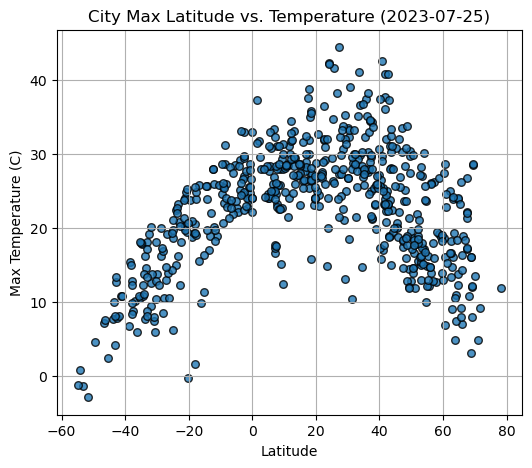

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(6,5),
              title="City Max Latitude vs. Temperature (2023-07-25)",edgecolors="black", alpha=0.80, s=30)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("Assignment_Week_6/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

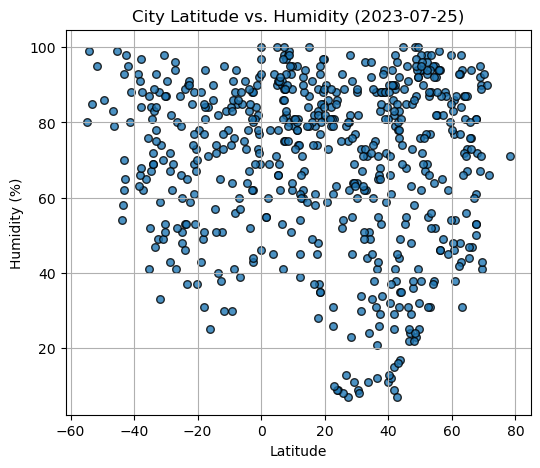

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(6,5),
              title="City Latitude vs. Humidity (2023-07-25)",edgecolors="black", alpha=0.80, s=30)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Assignment_Week_6/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

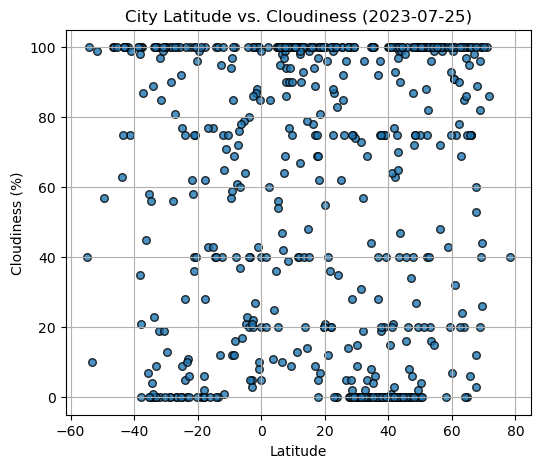

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(6,5),
              title="City Latitude vs. Cloudiness (2023-07-25)",edgecolors="black", alpha=0.80, s=30)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Assignment_Week_6/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

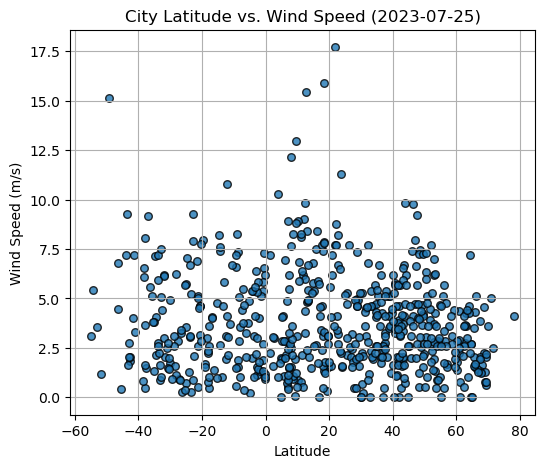

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(6,5),
              title="City Latitude vs. Wind Speed (2023-07-25)",edgecolors="black", alpha=0.80, s=30)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("Assignment_Week_6/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(x,y,coord):
    correlation = st.pearsonr(x,y)
    (slope, intercept, rvalue, pvalue, stderr)=st.linregress(x,y)
    regress= x * slope + intercept
    line_eq= f"y= {round(slope, 2)}x + {round(intercept, 2)}"
    print(f"The r-value is: {rvalue}")
    plt.scatter(x,y)
    plt.plot(x,regress,"r-")
    plt.annotate(line_eq, coord, fontsize=12, color="red")
    plt.xlabel(x.name)
    plt.ylabel(y.name)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,harstad,68.7990,16.5293,16.00,92,82,2.26,NO,1690442003
1,bethel,41.3712,-73.4140,23.17,86,0,2.06,US,1690442004
2,thunder bay,48.4001,-89.3168,15.99,100,75,0.51,CA,1690442004
3,tiksi,71.6872,128.8694,9.18,66,86,2.47,RU,1690442004
4,tura,25.5198,90.2201,26.36,93,100,2.16,IN,1690442005


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,uturoa,-16.7333,-151.4333,25.80,84,43,4.06,PF,1690442005
11,pitimbu,-7.4706,-34.8086,23.33,85,61,4.43,BR,1690442007
12,adamstown,-25.0660,-130.1015,19.67,60,9,3.56,PN,1690442007
19,grytviken,-54.2811,-36.5092,0.78,99,100,5.42,GS,1690441851
20,quimili,-27.6333,-62.4167,10.45,69,56,2.85,AR,1690442009


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5203876952929373


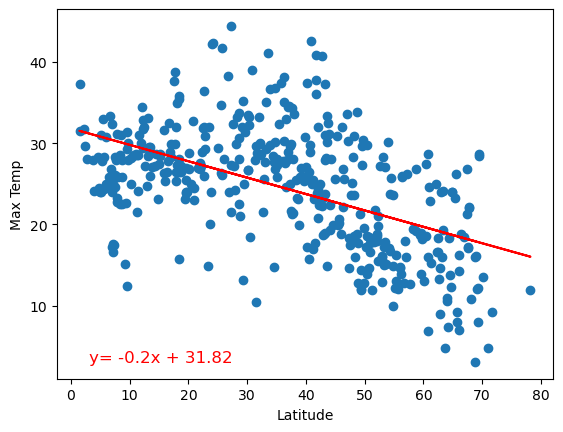

In [15]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"].rename("Latitude"),northern_hemi_df["Max Temp"],(3,3))

The plot between Latitude and Maximum Temperature for nothern hemisphere shows a moderate negative correlation which means that as the cities move away from the equator, the temperature drops.

The r-value is: 0.8325734848275257


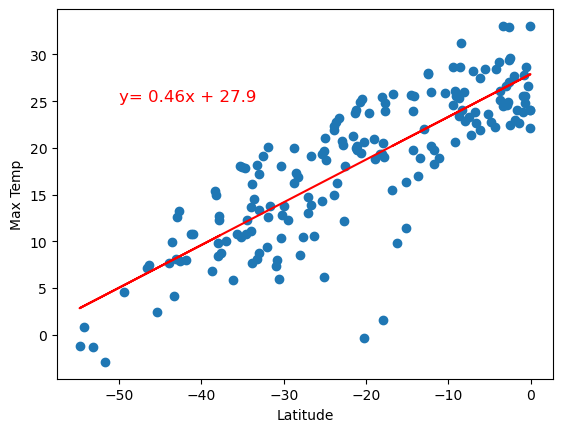

In [16]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"].rename("Latitude"),southern_hemi_df["Max Temp"],(-50,25))

The plot between Latitude and Maximum Temperature for southern hemisphere shows a strong positive correlation which means that as the cities move closer to the equator, the temperature rises.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.0695070824874126


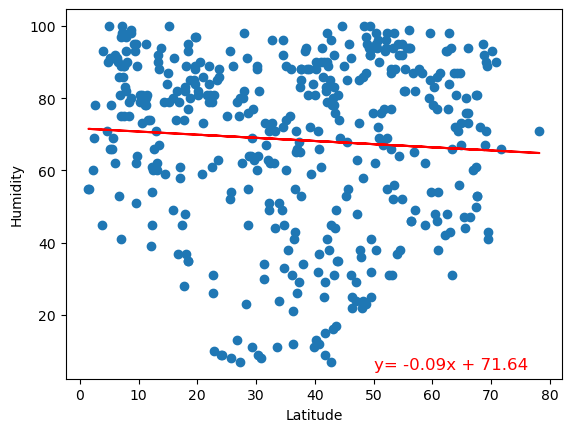

In [17]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"].rename("Latitude"),northern_hemi_df["Humidity"],(50,5))

The plot between Latitude and Humidity for northern hemisphere shows a very weak negative correlation and the data points are not following any specific pattern.

The r-value is: -0.0707438760770574


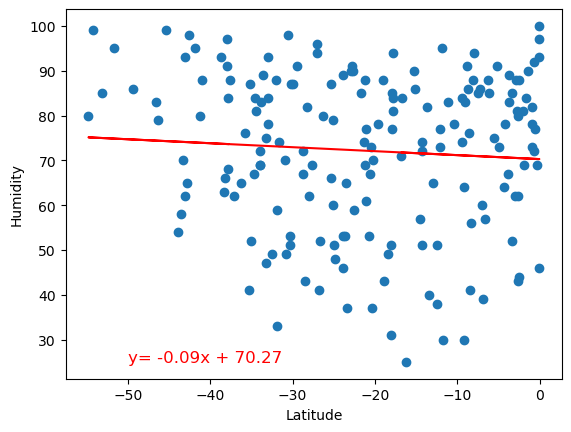

In [18]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"].rename("Latitude"),southern_hemi_df["Humidity"],(-50,25))

The plot between Latitude and Humidity for southern hemisphere shows a very weak negative correlation and the data points are not following any specific pattern.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.042996931143189455


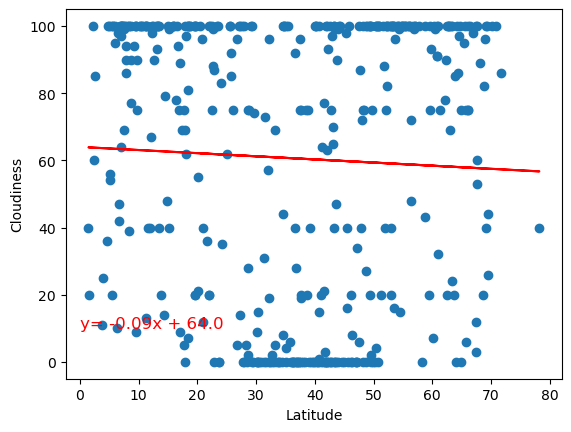

In [19]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"].rename("Latitude"),northern_hemi_df["Cloudiness"],(0,10))

The plot between Latitude and Cloudiness for northern hemisphere shows a very weak negative correlation and the data points are spread out and not following any specific pattern.

The r-value is: -0.10847534448303155


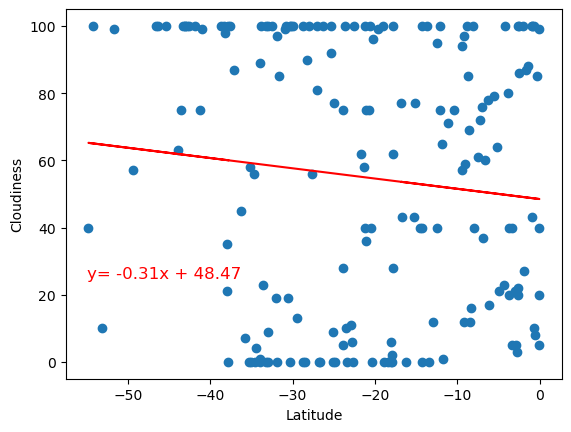

In [20]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"].rename("Latitude"),southern_hemi_df["Cloudiness"],(-55,25))

The plot between Latitude and Cloudiness for southern hemisphere shows a very weak negative correlation and the data points are spread out and not following any specific pattern.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.18803235795886658


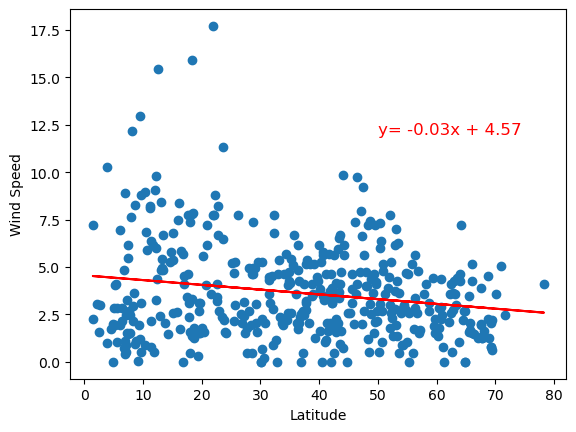

In [21]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"].rename("Latitude"),northern_hemi_df["Wind Speed"],(50,12))

The plot between Latitude and Wind Speed for northern hemisphere shows a very weak negative correlation and the data points are not following any specific pattern.

The r-value is: -0.06587937292925299


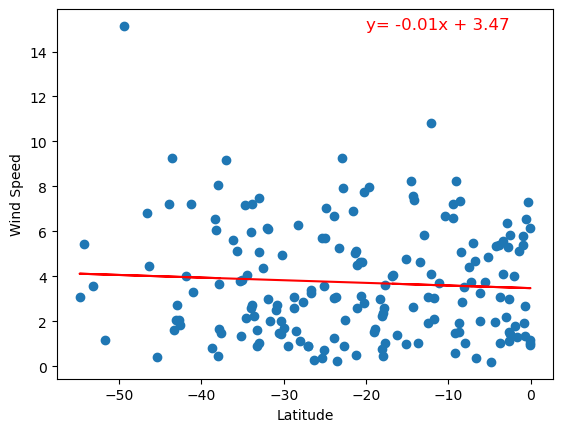

In [22]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"].rename("Latitude"),southern_hemi_df["Wind Speed"],(-20,15))

The plot between Latitude and Wind Speed for southern hemisphere shows a very weak negative correlation and the data points are not following any specific pattern.